In [ ]:
# Install pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.6 MB/s 
     |████████████████████████████████| 1.3 MB 45.9 MB/s 
     |████████████████████████████████| 3.3 MB 41.7 MB/s 
     |████████████████████████████████| 25.9 MB 42.1 MB/s 
     |████████████████████████████████| 325 kB 55.7 MB/s 
     |████████████████████████████████| 2.0 MB 31.5 MB/s 
     |████████████████████████████████| 6.8 MB 13.0 MB/s 
     |████████████████████████████████| 141 kB 58.2 MB/s 
     |████████████████████████████████| 1.7 MB 43.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 17.0 MB 18.7 MB/s 
     |████████████████████████████████| 636 kB 40.8 MB/s 
     |███████████████████████████████

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

In [ ]:
# Get data from zip
import pandas as pd
df_bank = pd.read_csv('bank-additional/bank-additional.csv', sep=";")
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
# Import pycaret
from pycaret.classification import *

data = df_bank.sample(frac=0.9, random_state=786)
data_unseen = df_bank.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3707, 21)
Unseen Data For Predictions: (412, 21)


In [ ]:
# Set up environment
exp_mclf101 = setup(data = data, target = 'y', session_id=123) 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(3707, 21)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
# Compare all models
best_model = compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9140,0.9328,0.4687,0.6975,0.5582,0.5129,0.5266,0.693
lda,Linear Discriminant Analysis,0.9136,0.9342,0.5245,0.6707,0.5846,0.5375,0.5448,0.056
gbc,Gradient Boosting Classifier,0.9106,0.9398,0.5146,0.6512,0.5730,0.5239,0.5295,0.487
ridge,Ridge Classifier,0.9090,0.0000,0.3788,0.7047,0.4886,0.4443,0.4719,0.022
ada,Ada Boost Classifier,0.9067,0.9125,0.4581,0.6442,0.5317,0.4820,0.4926,0.344
rf,Random Forest Classifier,0.9036,0.9244,0.3763,0.6669,0.4762,0.4278,0.4515,0.616
lightgbm,Light Gradient Boosting Machine,0.9002,0.9283,0.4785,0.5985,0.5289,0.4740,0.4793,0.175
et,Extra Trees Classifier,0.8975,0.8995,0.3269,0.6198,0.4251,0.3750,0.3996,0.611
knn,K Neighbors Classifier,0.8921,0.8547,0.4684,0.5496,0.5025,0.4427,0.4463,0.152
dummy,Dummy Classifier,0.8832,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.021


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Create best model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9038,0.9268,0.4333,0.6190,0.5098,0.4583,0.4673
1,0.9077,0.9252,0.4194,0.6842,0.5200,0.4722,0.4895
2,0.9192,0.9494,0.5484,0.7083,0.6182,0.5738,0.5797
3,0.9154,0.9470,0.4194,0.7647,0.5417,0.4994,0.5268
4,0.9112,0.9038,0.4333,0.6842,0.5306,0.4843,0.4997
5,0.9189,0.9328,0.5333,0.6957,0.6038,0.5595,0.5656
6,0.9189,0.9373,0.5667,0.6800,0.6182,0.5732,0.5762
7,0.9035,0.9255,0.3667,0.6471,0.4681,0.4194,0.4400
8,0.9228,0.9546,0.4667,0.7778,0.5833,0.5437,0.5653


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Tune model
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9077,0.9270,0.4333,0.6500,0.5200,0.4712,0.4831
1,0.9077,0.9251,0.4194,0.6842,0.5200,0.4722,0.4895
2,0.9115,0.9477,0.5484,0.6538,0.5965,0.5472,0.5499
3,0.9308,0.9480,0.5161,0.8421,0.6400,0.6041,0.6263
4,0.9112,0.9044,0.4333,0.6842,0.5306,0.4843,0.4997
5,0.9266,0.9364,0.5667,0.7391,0.6415,0.6014,0.6080
6,0.9151,0.9380,0.5667,0.6538,0.6071,0.5598,0.5616
7,0.9035,0.9243,0.3667,0.6471,0.4681,0.4194,0.4400
8,0.9189,0.9520,0.4333,0.7647,0.5532,0.5123,0.5374


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


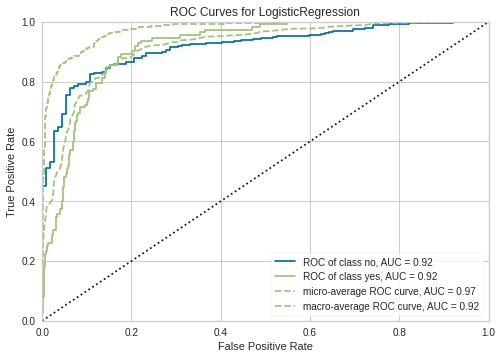

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Plot model
plot_model(tuned_lr, plot = 'auc')

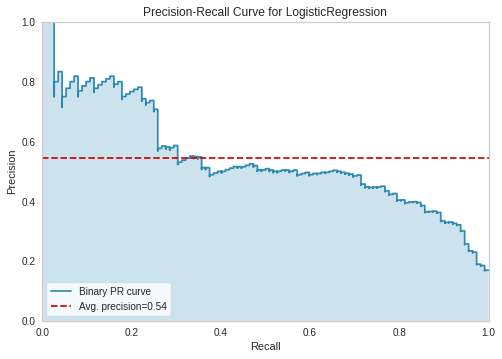

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Precision-Recall Curve
plot_model(tuned_lr, plot = 'pr')

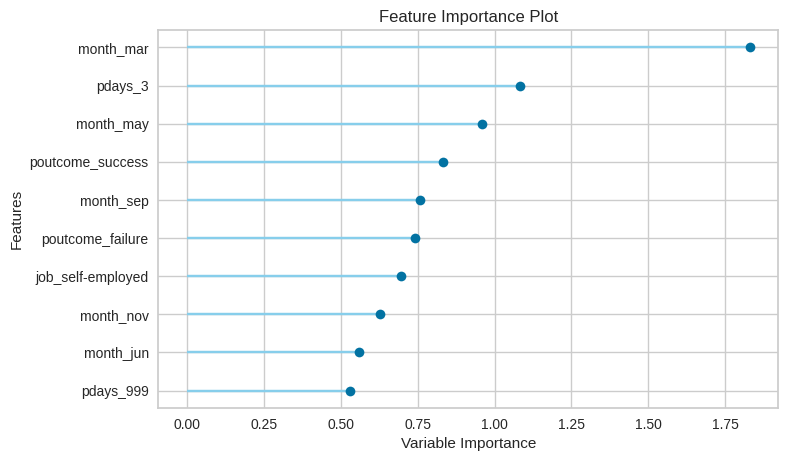

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Feature Importance Plot
plot_model(tuned_lr, plot='feature')

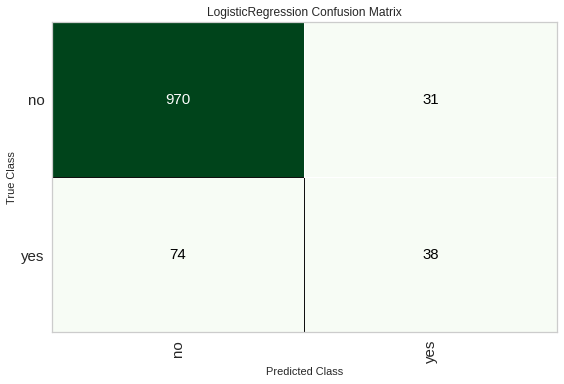

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Confusion Matrix
plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
# Predict Model
predict_model(tuned_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9057,0.9168,0.3393,0.5507,0.4199,0.3717,0.3846


In [ ]:
# Finalize Model for Deployment
final_lr= finalize_model(tuned_lr)
print(final_lr)
predict_model(final_lr);

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_int

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9102,0.9266,0.3482,0.5909,0.4382,0.3929,0.4092


In [ ]:
# predict on unseen data
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.936,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,no,0.7596
1,36,self-employed,single,basic.4y,no,no,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,no,0.9839
2,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,...,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,no,0.9833
3,46,admin.,divorced,university.degree,no,yes,no,telephone,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,no,0.9932
4,45,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,no,0.9904


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['y'], unseen_predictions['Label'], metric = 'Accuracy')

0.9393

In [ ]:
# Save model
save_model(final_lr,'Final LR Model 29Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Final LR Model 29Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                       

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.863, class_weight={}, dual=False,
                 